In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None

df = pd.read_csv('../data/external/heart.csv')
df.head()
df.columns = ['age', 'sex', 'chest_pain_type', 'blood_pressure_resting', 'cholesterol', 'blood_suger_fasting', 'electrocardiogram', 'max_heart_rate', 'angina', 's_trajectory', 'slope', 'blood_vessels', 'thalassemia', 'target']

In [2]:
df.head()

,age,sex,chest_pain_type,blood_pressure_resting,cholesterol,blood_suger_fasting,electrocardiogram,max_heart_rate,angina,s_trajectory,slope,blood_vessels,thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


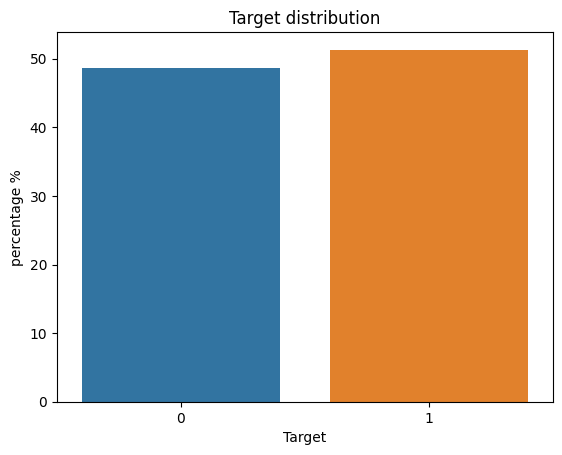

In [4]:
import matplotlib.pyplot as pyplot
import seaborn as seaborn
seaborn.barplot(x=df.target.value_counts().index,y=100*df.target.value_counts(normalize=True))
pyplot.title('Target distribution')
pyplot.xlabel("Target")
pyplot.ylabel("percentage %")
pyplot.show()


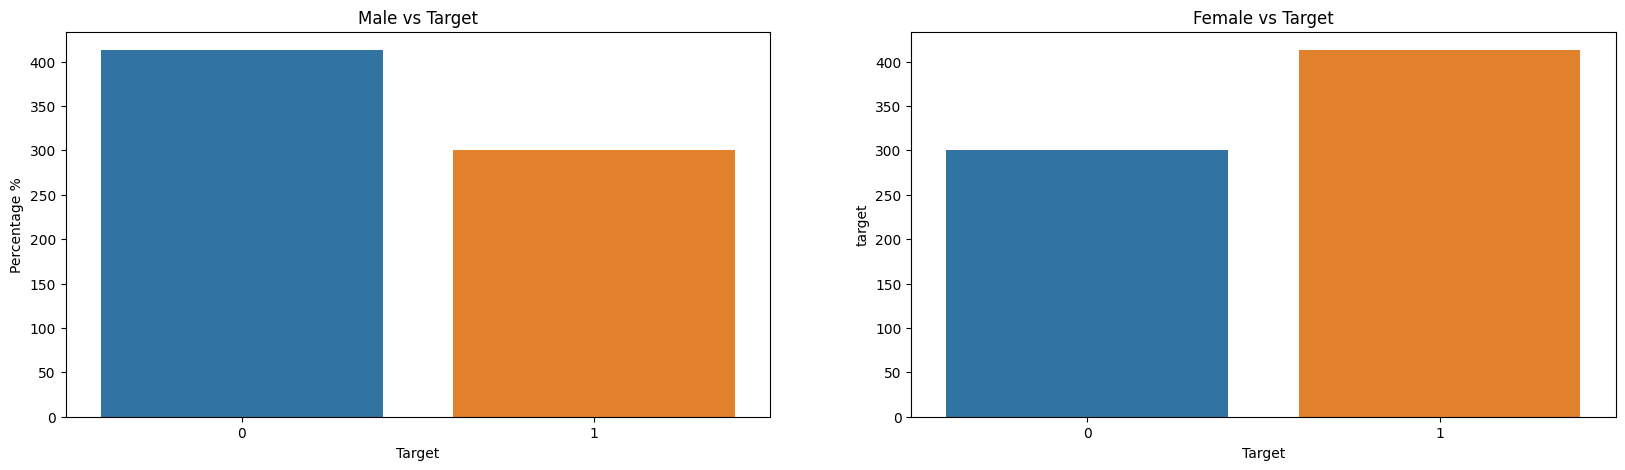

In [5]:
pyplot.figure(figsize=(20,5))
pyplot.subplot(1,2,1)
seaborn.barplot(x=df[df.sex == 1].target.value_counts().index,y=df[df.sex==1].target.value_counts())
pyplot.xlabel("Target")
pyplot.ylabel("Percentage %")
pyplot.title("Male vs Target")
pyplot.subplot(1,2,2)
seaborn.barplot(x=df[df.sex == 0].target.value_counts().index,y=df[df.sex==1].target.value_counts())
pyplot.xlabel("Target")
pyplot.title("Female vs Target")
pyplot.show()

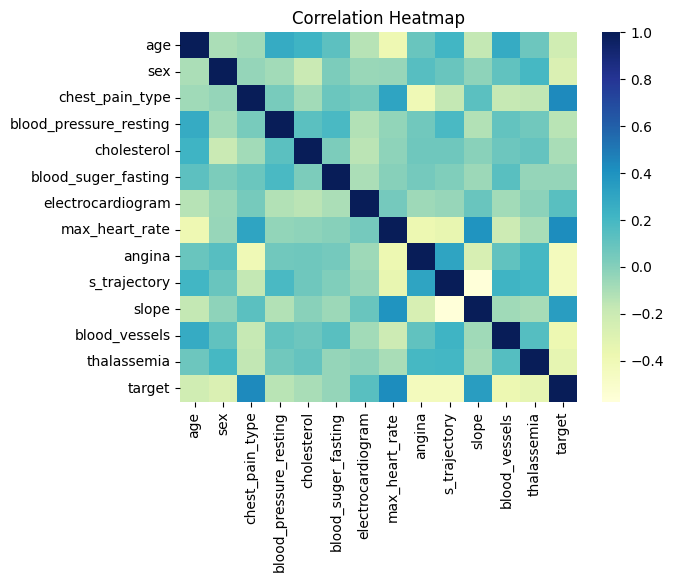

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# create correlation matrix
corr_matrix = df.corr()

# create heatmap
sns.heatmap(corr_matrix, cmap="YlGnBu")

# set title
plt.title("Correlation Heatmap")

# show plot
plt.show()


In [7]:
import numpy as np

def iqrOutliers(df, column):
  global lower, upper
  q25, q75 = np.quantile(df[column],0.25), np.quantile(df[column],0.75)
  iqr = q75 - q25
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off , q75 + cut_off
  print('the found value of iqr is',iqr)
  print('the lower bound value is', lower)
  print('the upper bound value is', upper)
  df1 = df[df[column] > upper]
  df2 = df[df[column] < lower]
  return print('total number of outliers are', df1.shape[0]+df2.shape[0])

iqrOutliers(df,'cholesterol')

the found value of iqr is 64.0
the lower bound value is 115.0
the upper bound value is 371.0
total number of outliers are 16


### K-Nearest Neighbors and Logistic Regression Model Comparison
Image taken from roc_curve branch on github. Compares the performance of both models in regards to classification 
![KNN ROC Curve](roc_curve.png)
![LR ROC Curve](lr_roc_curve.png)
